In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
## population and age classes
M=16  ## number of age classes

my_data = np.genfromtxt('../data/age_structures/Denmark-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni=aM+aF;   Ni=Ni[0:M];  N=np.sum(Ni)

In [4]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.Denmark()

In [5]:
# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.ContactMatrixFunction(CH, CW, CS, CO)

contactMatrix = generator.constant_contactMatrix()

## SIR

In [6]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; Is_0[4:8]=67;  Is_0[8:10]=126; Is_0[10:12]=80
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.stochastic.SIR(parameters, M, Ni)


# start simulation
Tf=21;  Nf=700 
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

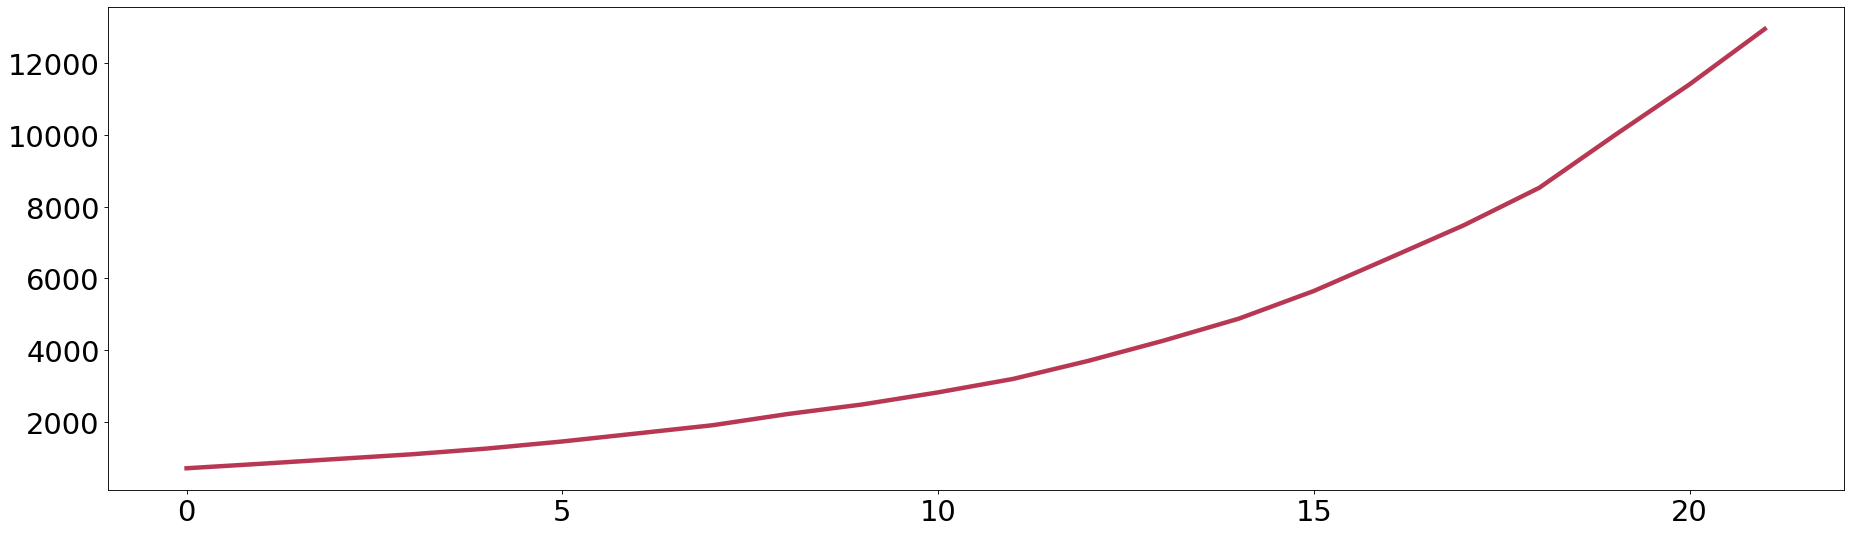

In [7]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

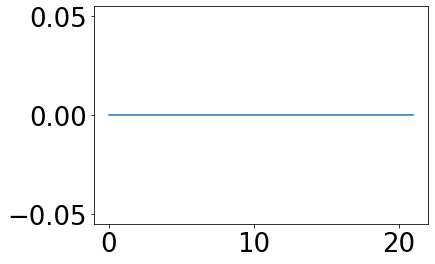

In [8]:
S  = model.S(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)
plt.plot( (S+Ia+Is+R).sum(axis=1) - N );

## SEIR

In [9]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
gE    = 1/4             # rate to go from E to I
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; 
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
E_0 = np.zeros((M));  E_0[2:14]=2
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gE':gE, 'gIa':gIa,'gIs':gIs,'fsa':fsa}
model = pyross.stochastic.SEIR(parameters, M, Ni)


# start simulation
Tf=54;  Nf=700 
data=model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

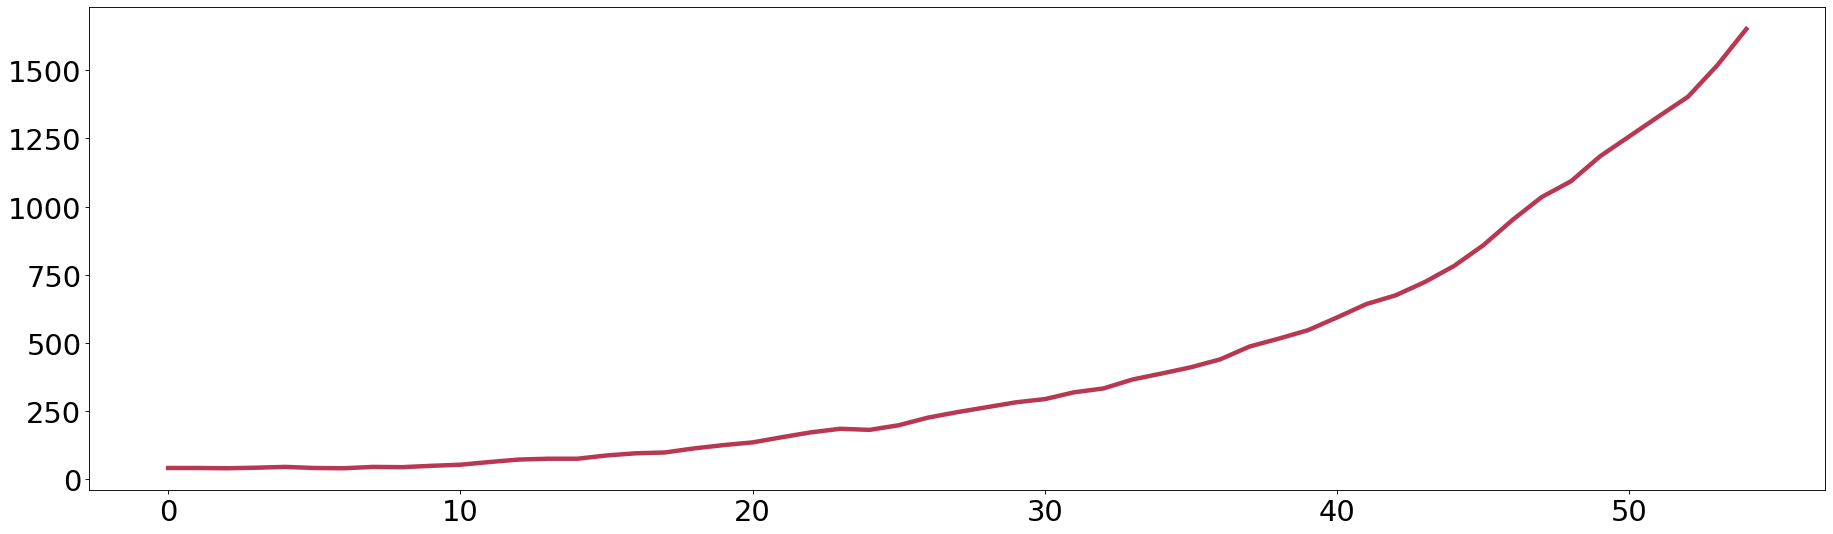

In [10]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8);

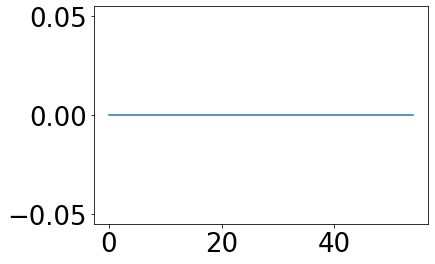

In [11]:
S  = model.S(data)
E  = model.E(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)
plt.plot( (S+E+Ia+Is+R).sum(axis=1) - N );

## SEAI5R

Here $N_i$ is the alive population, such that

$R_i = N_i(t) - (S_i + E_i + A_i + I^a_i + I^s_i + I^h_i + I^c_i)$

In [12]:
beta  = 0.036692            # infection rate 

gE    = 1/5
gA    = 1/3
gIa   = 1./7                # removal rate of asymptomatic infectives 
gIs   = 1./7                # removal rate of symptomatic infectives 
alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 0.2                   # the self-isolation parameter   
fh    = 0
gIh   = 1/14
gIc   = 1/14
 
sa    = 100*np.ones(M)      # arrival of new susceptibles
sa[0] = 1500


hh   = 0.1*np.ones(M)
cc   = 0.05*np.ones(M)      
mm   = 0.4*np.ones(M)      






# initial conditions    
Is_0 = np.zeros((M));  Is_0[6:13]=8;  Is_0[2:6]=4; Is_0[13:16]=4

Ia_0 = np.zeros((M));  Ia_0[6:13]=4;  Ia_0[2:6]=2; Ia_0[13:16]=2
R_0  = np.zeros((M))
E_0  = np.zeros((M))
A_0  = np.zeros((M))
Ih_0  = np.zeros((M))
Ic_0  = np.zeros((M))
Im_0  = np.zeros((M))

S_0  = Ni - (Ia_0 + Is_0 + R_0)

0.0

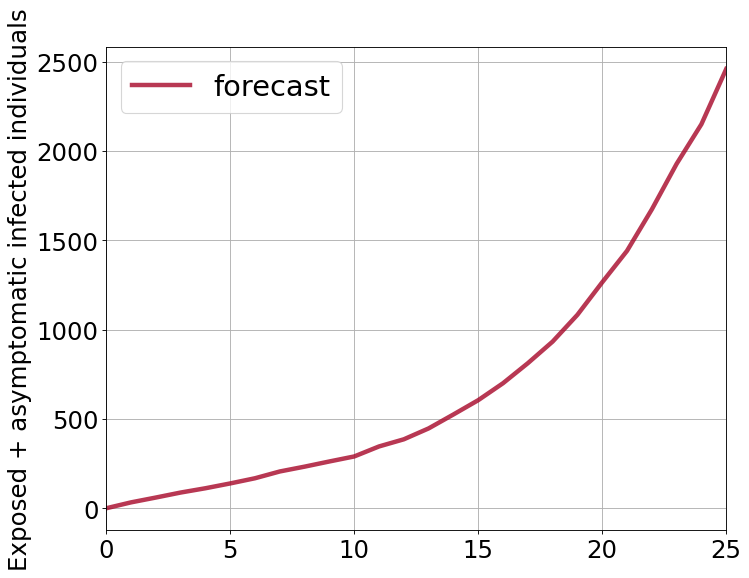

In [13]:
# duration of simulation and data file
Tf=25;  Nf=Tf+1;  



# intantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,
              'gIh':gIh,'gIc':gIc,  'gE':gE, 'gA':gA,
              'fsa':fsa, 'fh':fh, 
              'sa':sa, 
              'hh':hh, 'cc':cc, 'mm':mm}
model = pyross.stochastic.SEAI5R(parameters, M, Ni)




data=model.simulate(S_0, E_0, A_0, Ia_0, Is_0, Ih_0, Ic_0, Im_0, contactMatrix, Tf, Nf)


t = data['t']; IC  = np.zeros((Nf))
for i in range(2*M):
        IC += data['X'][:,M+i]
        

        
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

 
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Exposed + asymptomatic infected individuals'); #plt.xlim(0, 40); plt.ylim(0, 9999);
#plt.savefig('/Users/rsingh/Desktop/2a.png', format='png', dpi=212)
IC[0]

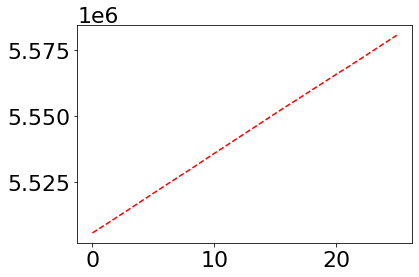

In [14]:
population  = model.population
plt.plot( population.sum(axis=1), 'r--' );

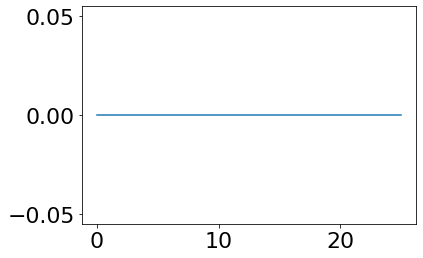

In [15]:
S  = model.S(data)
E  = model.E(data)
A  = model.A(data)
Ia = model.Ia(data)
Is = model.Is(data)
Ih = model.Ih(data)
Ic = model.Ic(data)
Im = model.Im(data)

R  = model.R(data)
Rtest = population - (S+E+A+Ia+Is+Ih+Ic)


plt.plot( (R-Rtest).sum(axis=1) );
plt.ylim(-1,1);